In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [4]:
from utils import *

In [9]:
X_train, X_test, y_train, y_test = one_station("ghcnd_hcn/USC00057936_CO_pair_data.csv", 'PRCP2')
X_test = X_test.drop(['STATION', 'LAT', 'LON', 'ELEV'], axis=1)
X_train = X_train.drop(['STATION', 'LAT', 'LON', 'ELEV'], axis=1)
X_train

,DATE,PRCP1,TMAX1,TMIN1,SNOW1,SNOWD1,TMAX2,TMIN2,SNOW2,SNOWD2
1837,726911.0,41.0,39.0,-122.0,58.0,457.0,39.0,-122.0,58.0,457.0
1703,726615.0,0.0,89.0,-61.0,0.0,0.0,89.0,-61.0,0.0,0.0
957,724851.0,0.0,272.0,39.0,0.0,0.0,272.0,39.0,0.0,0.0
1323,725764.0,46.0,-67.0,-156.0,89.0,457.0,-67.0,-156.0,89.0,457.0
2962,729467.0,0.0,-67.0,-206.0,0.0,762.0,-67.0,-206.0,0.0,762.0
...,...,...,...,...,...,...,...,...,...,...
3772,732003.0,0.0,11.0,-161.0,0.0,279.0,11.0,-161.0,0.0,279.0
5191,736673.0,0.0,117.0,-72.0,0.0,0.0,117.0,-72.0,0.0,0.0
5226,736743.0,0.0,44.0,-56.0,0.0,305.0,44.0,-56.0,0.0,305.0
5390,737101.0,0.0,6.0,-217.0,0.0,737.0,6.0,-217.0,0.0,737.0


In [11]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
DATE,4404.0,729345.022707,4031.645991,722815.0,725907.5,729093.0,732720.5,737327.0
PRCP1,4404.0,18.233878,36.262497,0.0,0.0,0.0,18.0,221.0
TMAX1,4404.0,120.286785,119.152182,-200.0,22.0,106.0,233.0,317.0
TMIN1,4404.0,-50.321753,91.958797,-422.0,-111.0,-39.0,22.0,139.0
SNOW1,4404.0,16.133061,40.537407,0.0,0.0,0.0,0.0,462.0
SNOWD1,4404.0,194.082879,286.504155,0.0,0.0,0.0,356.0,1448.0
TMAX2,4404.0,120.222752,119.097267,-200.0,22.0,106.0,228.0,317.0
TMIN2,4404.0,-50.542234,91.903581,-422.0,-111.0,-39.0,22.0,139.0
SNOW2,4404.0,16.226158,40.696532,0.0,0.0,0.0,0.0,462.0
SNOWD2,4404.0,193.862852,286.690972,0.0,0.0,0.0,356.0,1448.0


In [14]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

In [15]:
normed_train_data

,DATE,PRCP1,TMAX1,TMIN1,SNOW1,SNOWD1,TMAX2,TMIN2,SNOW2,SNOWD2
1837,-0.603729,0.627815,-0.682210,-0.779460,1.032798,0.917673,-0.681987,-0.777530,1.026472,0.917842
1703,-0.677148,-0.502830,-0.262578,-0.116120,-0.397980,-0.677417,-0.262162,-0.113791,-0.398711,-0.676208
957,-1.114687,-0.502830,1.273273,0.971324,-0.397980,-0.677417,1.274397,0.974306,-0.398711,-0.676208
1323,-0.888228,0.765698,-1.571828,-1.149191,1.797523,0.917673,-1.572016,-1.147483,1.788207,0.917842
2962,0.030255,-0.502830,-1.571828,-1.692913,-0.397980,1.982230,-1.572016,-1.691531,-0.398711,1.981706
...,...,...,...,...,...,...,...,...,...,...
3772,0.659278,-0.502830,-0.917203,-1.203563,-0.397980,0.296391,-0.917089,-1.201888,-0.398711,0.296965
5191,1.817614,-0.502830,-0.027585,-0.235739,-0.397980,-0.677417,-0.027060,-0.233481,-0.398711,-0.676208
5226,1.834977,-0.502830,-0.640247,-0.061748,-0.397980,0.387140,-0.640004,-0.059386,-0.398711,0.387655
5390,1.923774,-0.502830,-0.959167,-1.812532,-0.397980,1.894971,-0.959071,-1.811222,-0.398711,1.894504


In [38]:
def build_model():
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(8, activation='softmax')
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [39]:
model = build_model()
model.fit(X_train.values, y_train, epochs=5)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})

In [40]:
y_train.index('')

ValueError: '' is not in list

In [29]:
model.fit(normed_train_data.values, y_train, epochs=100)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'str'>"})

In [51]:
df = pd.read_csv("ghcnd_hcn/USC00057936_CO_pair_data.csv")
pd.qcut(df['PRCP2'], q=20, duplicates='drop')

0        (13.0, 20.0]
1        (13.0, 20.0]
2        (13.0, 20.0]
3        (13.0, 20.0]
4        (13.0, 20.0]
            ...      
5502    (-0.001, 3.0]
5503    (-0.001, 3.0]
5504    (-0.001, 3.0]
5505    (-0.001, 3.0]
5506              NaN
Name: PRCP2, Length: 5507, dtype: category
Categories (9, interval[float64]): [(-0.001, 3.0] < (3.0, 8.0] < (8.0, 13.0] < (13.0, 20.0] ... (30.0, 43.0] < (43.0, 66.0] < (66.0, 97.0] < (97.0, 221.0]]

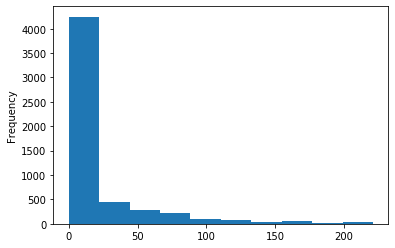

In [50]:
df['PRCP2'].plot.hist()

0       (-0.221, 22.1]
1       (-0.221, 22.1]
2       (-0.221, 22.1]
3       (-0.221, 22.1]
4       (-0.221, 22.1]
             ...      
5502    (-0.221, 22.1]
5503    (-0.221, 22.1]
5504    (-0.221, 22.1]
5505    (-0.221, 22.1]
5506               NaN
Name: PRCP2, Length: 5507, dtype: category
Categories (10, interval[float64]): [(-0.221, 22.1] < (22.1, 44.2] < (44.2, 66.3] < (66.3, 88.4] ... (132.6, 154.7] < (154.7, 176.8] < (176.8, 198.9] < (198.9, 221.0]]